<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculando-o-mínimo-de-uma-função" data-toc-modified-id="Calculando-o-mínimo-de-uma-função-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculando o mínimo de uma função</a></span></li><li><span><a href="#1:-Funções-básicas" data-toc-modified-id="1:-Funções-básicas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1: Funções básicas</a></span><ul class="toc-item"><li><span><a href="#Métodos-de-bisseção-e-Newton" data-toc-modified-id="Métodos-de-bisseção-e-Newton-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Métodos de bisseção e Newton</a></span></li><li><span><a href="#Derivadas-numéricas" data-toc-modified-id="Derivadas-numéricas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Derivadas numéricas</a></span></li><li><span><a href="#Erro-de-aproximação-da-derivada-central-iterada" data-toc-modified-id="Erro-de-aproximação-da-derivada-central-iterada-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Erro de aproximação da derivada central iterada</a></span></li></ul></li><li><span><a href="#2:-Um-problema-modelo" data-toc-modified-id="2:-Um-problema-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2: Um problema modelo</a></span><ul class="toc-item"><li><span><a href="#Preparando-a-bisseção" data-toc-modified-id="Preparando-a-bisseção-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparando a bisseção</a></span></li><li><span><a href="#Gráficos-da-bisseção" data-toc-modified-id="Gráficos-da-bisseção-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gráficos da bisseção</a></span></li><li><span><a href="#Newton" data-toc-modified-id="Newton-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Newton</a></span></li></ul></li><li><span><a href="#3:-O-mesmo-problema,-mais-complicado" data-toc-modified-id="3:-O-mesmo-problema,-mais-complicado-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3: O mesmo problema, mais complicado</a></span></li></ul></div>

![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    iters = 0
    m = (a+b)/2
    pts = [m]
    fm = f(m)
    while abs(b-a)>xtol and abs(fm)>ytol and iters<maxiter:
        if f(a)*fm<0:
            if a not in pts: pts.append(a);
            b = m
        elif f(b)*fm<0:
            if b not in pts: pts.append(b);
            a = m
        elif fm==0:
            return m, pts
        else:
            if f(a)==0:
                if a not in pts: pts.append(a);
                return a, pts
            if f(b)==0:
                if b not in pts: pts.append(b);
                return b, pts
            else: 
                return "sem resposta", pts
        m = (a+b)/2
        fm = f(m)
        if m not in pts: pts.append(m);
        iters+=1
    return pts

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    fx = f(x)
    step = fx/df(x)
    iters = 0
    pts = [x]
    while abs(fx)>ytol and abs(step)>xtol and iters < maxiter:
        x = x - step
        fx = f(x)
        step = fx/df(x)
        if x not in pts: pts.append(x);
        iters+=1
    return pts

## Derivadas numéricas

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    d = (f(x + h) - f(x-h))/(2*h)
    return d

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    d1 = lambda x: df_central(f,x,h)
    return df_central(d1, x, h)


## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

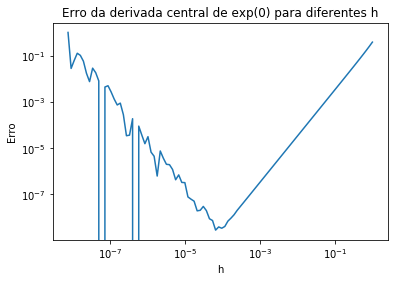

In [5]:
hs = np.logspace(-27,0,base=2, num=100)
f = lambda x: np.exp(x)
y = [abs(ddf_central(f, 0, h)-np.exp(0)) for h in hs]
plt.loglog(hs, y)
plt.title("Erro da derivada central de exp(0) para diferentes h")
plt.xlabel("h")
plt.ylabel("Erro")
ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?

Obs: Use erros relativos!

C:\Users\gusta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\Users\gusta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


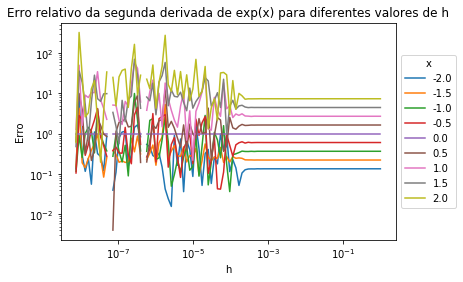

In [7]:
hs = np.logspace(-27,0,base=2, num=100)
xs = np.linspace(-2,2,num=9)
yp = y

for x in xs:
    ys = [abs((ddf_central(f, x, h)-np.exp(x))) for h in hs]
    ys = [ys[i]/y[i] for i in range(100)] 
    plt.loglog(hs, ys, label=f"{x}")

plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
plt.title("Erro relativo da segunda derivada de exp(x) para diferentes valores de h")
plt.ylabel("Erro")
plt.xlabel("h")
ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente.

Para valores de x maiores que 0, a ordem de grandeza do erro aumenta; para velores menores, diminui. Na primeira metade dos valores de h, todos os erros de todos os x, variam desordenadamente por conta do truncamento. Na segunda metade os valores são relativamente constantes em suas ordens de grandeza. Como os erros foram feitos relativamente, dividindo pelo erro com x=0, alguns pontos não estão definidos quando a divisão seria por um erro considerado 0.

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, h=1e-3)

def g3(x):
    return df_central(f, x, h=1e-5)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

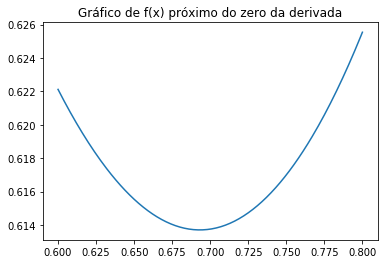

In [12]:
xs = np.linspace(0.6,0.8,201)
plt.plot(xs,f(xs))
plt.title("Gráfico de f(x) próximo do zero da derivada")
ax = plt.gca()

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Escolheria o intervalo $[0.6,0.8]$, pois pelo gráfico há um ponto de mínimo dentro dele e é seguro e suficientemente pequeno. 

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

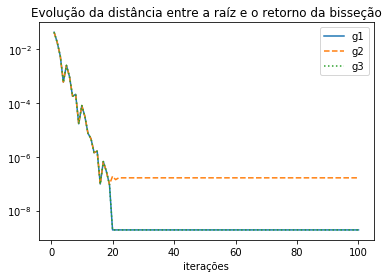

In [14]:
iters = np.linspace(1,100,100)
plt.semilogy(iters, [abs(bissecao_pts(g1, 0.6, 0.8, maxiter=i)[-1] - np.log(2)) for i in iters], label="g1")
plt.semilogy(iters, [abs(bissecao_pts(g2, 0.6, 0.8, maxiter=i)[-1] - np.log(2)) for i in iters], label="g2", linestyle="--")
plt.semilogy(iters, [abs(bissecao_pts(g3, 0.6, 0.8, maxiter=i)[-1] - np.log(2)) for i in iters], label="g3", linestyle=":")

plt.title("Evolução da distância entre a raíz e o retorno da bisseção")
plt.xlabel("iterações")
plt.legend()

ax = plt.gca()

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Até um número próximo de 20 iterações os três gráficos estavam identicos, passando nos mesmos pontos, oscilando em torno de uma reta com inclinação negativa. Ainda mais próximo de 20 iterações, os erros de g1 e g3 têm uma queda maior, mas ainda passando pelos mesmos pontos e g2 para de diminuir. Depois disso, de mais ou menos 20 iterações em diante, todas viraram uma reta horizontal, diferindo apenas da altura em que estão. g1 e g3, juntas estão bem mais abaixo da g2. A precisão da g2 é limitada pelo valor de h da definição dela. g1, não possui limitente por definição, então limita-se pela bisseção, e g3 como tem valor de h bem pequeno, permitindo maior precisão, consegue atingir o limite padrão da bisseção, junto com g1.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [16]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f, x)

In [17]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

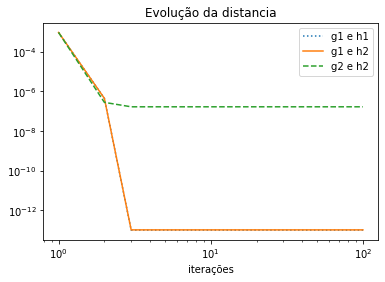

In [31]:
iters = np.linspace(1,100,100)

plt.loglog(iters, [abs(newton_pts(g1, h1, 0.65, maxiter=i)[-1]-np.log(2)) for i in iters], label="g1 e h1", linestyle="dotted")

plt.loglog(iters, [abs(newton_pts(g1, h2, 0.65, maxiter=i)[-1]-np.log(2)) for i in iters], label="g1 e h2")

plt.loglog(iters, [abs(newton_pts(g2, h2, 0.65, maxiter=i)[-1]-np.log(2)) for i in iters], label="g2 e h2", linestyle="--")

plt.legend()
plt.title("Evolução da distancia");
plt.xlabel("iterações");
ax = plt.gca();

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

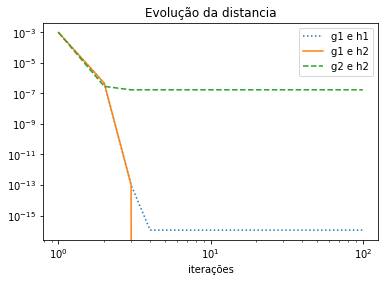

In [29]:
iters = np.linspace(1,100,100)

plt.loglog(iters, [abs(newton_pts(g1, h1, 0.65, maxiter=i, xtol=1e-15, ytol=1e-15)[-1]-np.log(2)) for i in iters], label="g1 e h1", linestyle="dotted")

plt.loglog(iters, [abs(newton_pts(g1, h2, 0.65, maxiter=i, xtol=1e-15, ytol=1e-15)[-1]-np.log(2)) for i in iters], label="g1 e h2")

plt.loglog(iters, [abs(newton_pts(g2, h2, 0.65, maxiter=i, xtol=1e-15, ytol=1e-15)[-1]-np.log(2)) for i in iters], label="g2 e h2", linestyle="--")

plt.legend()
plt.title("Evolução da distancia");
plt.xlabel("iterações");
ax = plt.gca();

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

In [21]:
## Código para explicação do gráfico ##

a= newton_pts(g1, h1, 0.65, maxiter=4, xtol=1e-15, ytol=1e-15)[-1]
print(f"a = {a}\n")
b= newton_pts(g1, h2, 0.65, maxiter=4, xtol=1e-15, ytol=1e-15)[-1]
print(f"b = {b}\n")
print(np.log(2))

a = 0.6931471805599454

b = 0.6931471805599453

0.6931471805599453


A primeira é a ordem de grandeza dos erros: Para a curva "g2 e h2" não parece ter mudado, já para as outras duas, foram muito menores que na anterior. A diferença entre "g2 e h2" e as outras duas aumentou muito mais conforme o aumento do número de iterações. A segunda diferença é que a curva "g1 e h2" não acompanhou a "g1 e h1" até o fim, ela foi a zero antes mesmo de atingir yto - diferente da outra, que atinge e vira uma reta pro resto do gráfico - por isso sua curva virou uma reta vertical. Como dito na explição anterior, para o gráfico usando a bisseção, g1 é limitada, e nesse caso, é pela precisão escolhida na função newton - diferente da g2, limitada pelo seu valor de h - então ambas descem ainda mais se comparada com a análise feita com os limites padrões do método de newton. No entanto, por terem as derivadas calculadas de formas diferentes, o step dentro do metodo de newton é também diferente entre elas: o valor retornado por h2, por ser uma aproximação limitada, é maior que o de h1 então o step calculado com a h2 é menor. Na quarta iteração, ambas atingem o limite ytol e xtol, mas a que utiliza h1, por ter step maior, arredonda para cima do valor de np.log(2) e a com h2, chega exatamente a este valor.

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

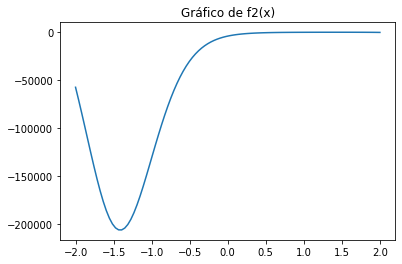

In [22]:
f2 = lambda x: np.exp((x**2) - (2*x) + 1) - 2**((x**3) - (6*x) + 12)
ys = np.linspace(-2,2, num=100)
plt.plot(ys, f2(ys))
plt.title("Gráfico de f2(x)")
ax = plt.gca()

In [23]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [24]:
df2 = lambda x: np.exp((x**2) - (2*x) + 1)*(2*x - 2) - ((2**((x**3) - (6*x) + 12)))*np.log(a)*(3*(x**2) - 6)
xs = bissecao_pts(df2, -1.75,-1.25)

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [25]:
fs = [f2(x) for x in xs]
print(f"Valor de f nos pontos : {fs}\n")
i= fs.index(min(fs))
print(f"Mínimo em x = {xs[i]}, cujo f(x) = {fs[i]}")

Valor de f nos pontos : [-201622.64448320126, -191327.43213335058, -205448.07103413306, -205941.94199760057, -206288.00613773827, -206265.11269190558, -206313.90682410283, -206298.87313136252, -206308.72769884934, -206304.38524777826, -206306.70263193815, -206305.58048575453, -206304.99200401639, -206305.28852910115, -206305.43507846963, -206305.36194654737, -206305.32527351487, -206305.34361895346, -206305.33444846486, -206305.33903426703, -206305.33674150563, -206305.33559502033, -206305.3361682717, -206305.3364548907, -206305.33631158172, -206305.33623992695, -206305.33627575406, -206305.33625784054]

Mínimo em x = -1.4140625, cujo f(x) = -206313.90682410283


Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [26]:
print(f"Distância do mínimo até último produzido pela bisseção: {xs[i] - xs[-1]}")

Distância do mínimo até último produzido pela bisseção: 0.002736669033765793


Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

In [27]:
df2_n = lambda x: df_central(f2, x)
ddf2_n = lambda x: ddf_central(f2, x)
x_bis = bissecao_pts(df2_n,-1.75,-1.25, xtol=1e-15, ytol=1e-15)
x_new = newton_pts(df2_n, ddf2_n, -1.5, xtol=1e-15, ytol=1e-15)

ys_bis = [f2(x) for x in x_bis]
y_min_bis = min(ys_bis)
x_min_bis = x_bis[ys_bis.index(y_min_bis)]

ys_new = [f2(x) for x in x_new]
y_min_new = min(ys_new)
x_min_new = x_new[ys_new.index(y_min_new)]

print(f"Mínimo do Método da bisseção: x= {x_min_bis}, f2= {y_min_bis}")
print(f"Distância até o último retornado: {abs(x_min_bis - x_bis[-1])}")

print(f"\nMínimo do Método de Newton: x= {x_min_bis}, f2= {y_min_bis}")


print(f"Distância até o último retornado:  {abs(x_min_new - x_new[-1])}")

Mínimo do Método da bisseção: x= -1.4128724038600922, f2= -206314.77303578667
Distância até o último retornado: 6.548361852765083e-10

Mínimo do Método de Newton: x= -1.4128724038600922, f2= -206314.77303578667
Distância até o último retornado:  0.0
